### Чтение данных представленной для анализа таблицы

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import scipy.stats as stats

In [2]:
hypothesis = pd.read_csv('hypothesis.csv')
orders = pd.read_csv('orders.csv')
visitors = pd.read_csv('visitors.csv')

In [3]:
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [4]:
for i in [hypothesis, orders, visitors]:
    display(i.sample(5))
    print('-' * 50)

,Hypothesis,Reach,Impact,Confidence,Efforts
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3


--------------------------------------------------


,transactionId,visitorId,date,revenue,group
383,3533599275,4018812886,2019-08-03,1490,B
409,822092266,4186744110,2019-08-03,570,B
739,2541955961,1230306981,2019-08-09,10137,A
502,735672072,3371539723,2019-08-24,320,A
742,1113045957,3323129950,2019-08-09,14490,A


--------------------------------------------------


,date,group,visitors
17,2019-08-18,A,668
49,2019-08-19,B,487
33,2019-08-03,B,509
5,2019-08-06,A,667
15,2019-08-16,A,361


--------------------------------------------------


**Вывод:**  
* Данные загружены корректно

### Оценка данных

In [5]:
def function(df):
    print ('------------- Краткая информация ------------')
    display(df.head())
    print ('*'*50)
    print ('------------- Сводные данные ------------')
    print(df.info())
    print ('*'*50)
    print ('------------- Количество пропусков ------------')
    print(df.isna().sum())
    print ('*'*50)
    print ('------------- Проверка наличия явных дубликатов ------------')
    if df.duplicated().sum() > 0:
        print ('Явных дубликатов - ', df.duplicated().sum())
    else:
        print ('Явных дубликатов нет')
    print ('*'*50)
    print ('------------- Количество уникальных значений ------------')
    for i in df.columns:
        print(f'в столбце {i} уникальных значений - {df[i].nunique()}')

In [6]:
for i in [hypothesis, orders, visitors]:
    function(i)

------------- Краткая информация ------------


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


**************************************************
------------- Сводные данные ------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None
**************************************************
------------- Количество пропусков ------------
Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64
**************************************************
------------- Проверка наличия явных дубликатов ------------
Явных дубликатов нет
**************************************************
------------- Количество уникальных значений ------------
в столбце Hypothesis уникальных з

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


**************************************************
------------- Сводные данные ------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None
**************************************************
------------- Количество пропусков ------------
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
**************************************************
------------- Проверка наличия явных дубликатов ------------
Явных дубликатов нет
**************************************************
------------- Количество уникальных значений --------

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


**************************************************
------------- Сводные данные ------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None
**************************************************
------------- Количество пропусков ------------
date        0
group       0
visitors    0
dtype: int64
**************************************************
------------- Проверка наличия явных дубликатов ------------
Явных дубликатов нет
**************************************************
------------- Количество уникальных значений ------------
в столбце date уникальных значений - 31
в столбце group уникальных значений - 2
в столбце visitors уникальных значений - 58


**Вывод:**  
* Явных убликатов и пропусков нет
* Названия столбцов представлены в разном регистре, требуется привести к однообразию
* Даты в столбцах имеют тип "object", требуется привести к соответствующему типу

### Предобработка данных

In [7]:
# Приведем названия столбцов к нижнему регистру
for i in [hypothesis, orders, visitors]:
    i.columns = i.columns.str.lower()
    print(i.columns)

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')
Index(['transactionid', 'visitorid', 'date', 'revenue', 'group'], dtype='object')
Index(['date', 'group', 'visitors'], dtype='object')


In [8]:
# Переведем тип данных в `datetime`
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [9]:
for i in [orders, visitors]:
    print(i.dtypes)
    print('-' * 50)

transactionid             int64
visitorid                 int64
date             datetime64[ns]
revenue                   int64
group                    object
dtype: object
--------------------------------------------------
date        datetime64[ns]
group               object
visitors             int64
dtype: object
--------------------------------------------------


**Вывод:**  
* Названия столбцов приведены к нижнему регистру
* Даты приведены к типу "datetime"

### Анализ данных
#### Приоритизация гипотез

Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [10]:
hypothesis['ice'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'] 
print(hypothesis[['hypothesis', 'ice']].sort_values(by = 'ice', ascending = False))

                                          hypothesis        ice
8  Запустить акцию, дающую скидку на товар в день...  16.200000
0  Добавить два новых канала привлечения трафика,...  13.333333
7  Добавить форму подписки на все основные страни...  11.200000
6  Показать на главной странице баннеры с актуаль...   8.000000
2  Добавить блоки рекомендаций товаров на сайт ин...   7.000000
1  Запустить собственную службу доставки, что сок...   2.000000
5  Добавить страницу отзывов клиентов о магазине,...   1.333333
3  Изменить структура категорий, что увеличит кон...   1.125000
4  Изменить цвет фона главной страницы, чтобы уве...   1.000000


Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [11]:
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
print(hypothesis[['hypothesis', 'rice']].sort_values(by = 'rice', ascending = False))

                                          hypothesis   rice
7  Добавить форму подписки на все основные страни...  112.0
2  Добавить блоки рекомендаций товаров на сайт ин...   56.0
0  Добавить два новых канала привлечения трафика,...   40.0
6  Показать на главной странице баннеры с актуаль...   40.0
8  Запустить акцию, дающую скидку на товар в день...   16.2
3  Изменить структура категорий, что увеличит кон...    9.0
1  Запустить собственную службу доставки, что сок...    4.0
5  Добавить страницу отзывов клиентов о магазине,...    4.0
4  Изменить цвет фона главной страницы, чтобы уве...    3.0


In [12]:
print(f'''
Приоритезация гипотез при ice:  {list(hypothesis[['hypothesis', 'ice']].sort_values(by = 'ice', ascending = False).index)}
Приоритезация гипотез при rice: {list(hypothesis[['hypothesis', 'rice']].sort_values(by = 'rice', ascending = False).index)}
     ''')


Приоритезация гипотез при ice:  [8, 0, 7, 6, 2, 1, 5, 3, 4]
Приоритезация гипотез при rice: [7, 2, 0, 6, 8, 3, 1, 5, 4]
     


In [13]:
hypothesis['reach'].sort_values().unique()

array([ 1,  2,  3,  5,  8, 10], dtype=int64)

**Вывод:**  
* Приоритет гипотез при применении фреймфорков ICE и RICE различается ввиду того, что фреймворк RICE учитывает параметр Reach - охват пользователей, который отражает коэффициент влияния гипотезы на пользователя, при этом значения параметра Reach варьируются от 1 до 10, что означает, что одни гипотеза практически не окажет влияние на конечного потребителя, а другая может резко изменить отношение пользователя к продукту

### Анализ A/B-теста
#### Построение графика кумулятивной выручки по группам.

In [14]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionid' : 'nunique', 'visitorid' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


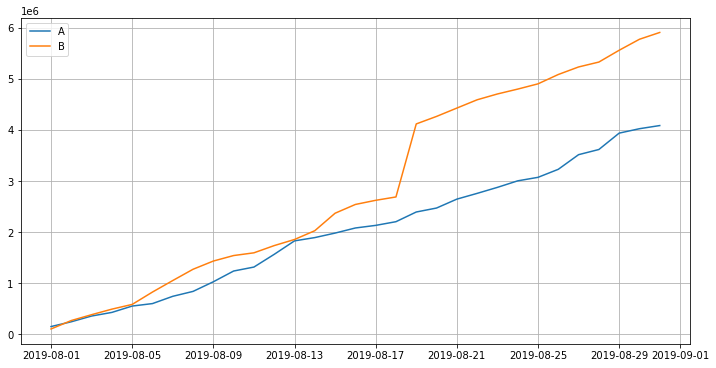

In [15]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12,6))
plt.grid(True)

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()

**Вывод**
* Накопленные показатели выручки обеих групп со временем растут с примерно одинаковой интенсивностью, при этом значения группы "В" в период с 17.08 до 21.08 показывает резкой рост выручки

#### Построение графика кумулятивного среднего чека по группам. 

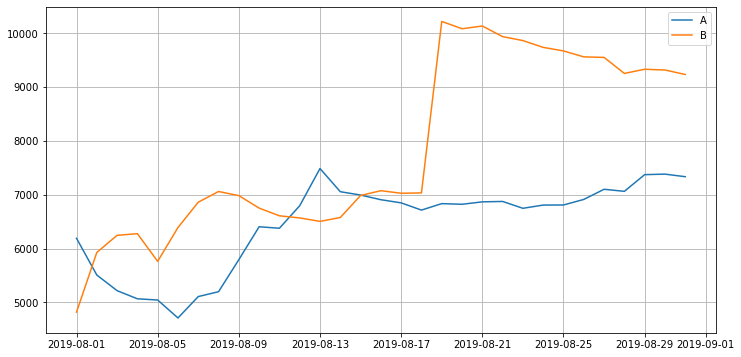

In [16]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 

**Вывод**
* Показатели среднего чека группы "В" выше, чем группы "А", при этом показатель "Б" в период с 17.08 до 21.08 показывает резкой рост среднего чека

#### Построение графика относительного изменения кумулятивного среднего чека группы B к группе A. 

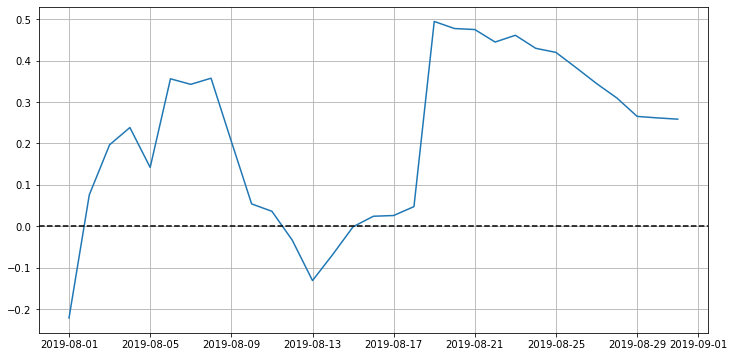

In [17]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12,6))
plt.grid(True)

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

**Вывод**
* Относитьное изменение среднего чека групп "В" и "А" показывает, что 1.08 и 13.08 средний чек "А" выше, чем "В", вместе с тем общий показатель среднего чека "В" значительно превышает "А"

#### Построение графика кумулятивной конверсии по группам.

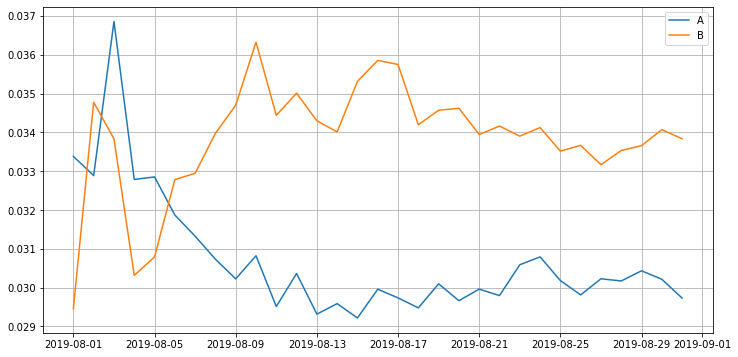

In [18]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(12,6))
plt.grid(True)
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

**Вывод**
* Показатели конверсии в первую неделю анализа подвержены колебаниям, но после относительно выравниваются и показатель "В" выше, чем "А"

#### Построение графика относительного изменения кумулятивной конверсии группы B к группе A.

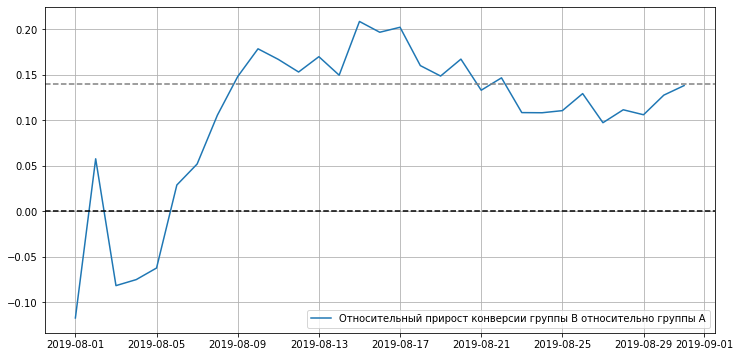

In [19]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12,6))
plt.grid(True)
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.14, color='grey', linestyle='--')

**Вывод**
* Показатель относительного изменения конверсии в первую неделю анализа подвержен колебаниям, но после относительно выравниваются и устанавливается на уровне 0.14 (в среднем накопительная конверсия группы "В" на 14% выше группы "А")

#### Построение графика количества заказов по пользователям.

In [20]:
ordersByUsers = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)

print(ordersByUsers.sort_values(by='transactionid', ascending=False).head(10)) 

       visitorid  transactionid
1023  4256040402             11
591   2458001652             11
569   2378935119              9
487   2038680547              8
44     199603092              5
744   3062433592              5
55     237748145              5
917   3803269165              5
299   1230306981              5
897   3717692402              5


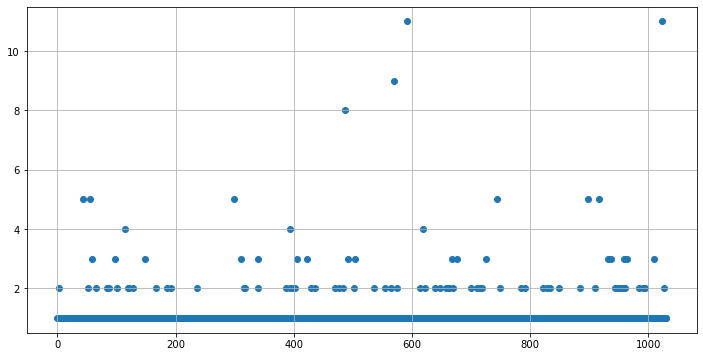

In [21]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(12,6))
plt.grid(True)
plt.scatter(x_values, ordersByUsers['transactionid'])

**Вывод**
* Большинство пользователей пользуются сервисом 1 раз, но встречаются некоторые, которые сделали заказ более 10 раз.

#### 95-й и 99-й перцентили количества заказов на пользователя

In [22]:
print(np.percentile(ordersByUsers['transactionid'], [95, 99]))

[2. 4.]


**Вывод**
* 95% пользователей использовали сервис не более 2 раз, при этом 99% пользователей использовали сервис не более 4 раз.

#### Построим точечный график стоимостей заказов

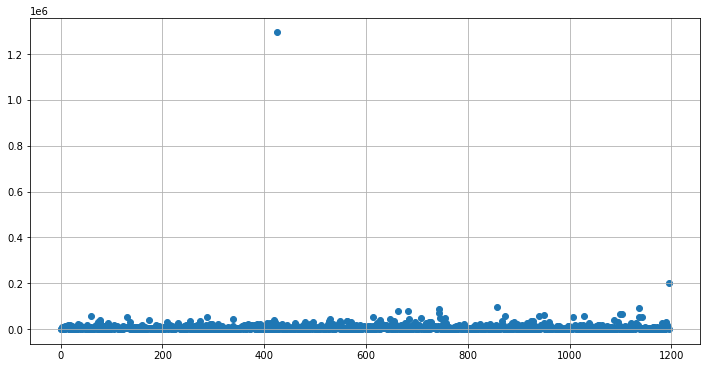

In [23]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(12,6))
plt.grid(True)
plt.scatter(x_values, orders['revenue']) 

**Вывод**
* Большинство заказов стоимостью до 100000, при этом есть заказы стоимостью более 1200000 

#### 95-й и 99-й перцентили стоимости заказов

In [24]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


**Вывод**
* 95% заказов стоимостью до 28000, при этом 99% заказов стоимостью не более 58233,2.

#### Cтатистическая значимость различий в конверсии между группами по «сырым» данным

In [25]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

In [26]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorid', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorid', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.017
0.138


**Н0:** Статистических различий в конверсии групп A и B по «сырым» данным нет.  
**Н1:** Конверсия групп A и B по «сырым» данным различаются.

In [27]:
alpha = 0.05

if round(stats.mannwhitneyu(sampleA, sampleB)[1], 3) < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Опровергнуть нулевую гипотезу нельзя')

Принимаем альтернативную гипотезу


**Вывод**
* Значение p-value = 0.017 меньше уровеня статистической значимости. Значит, конверсия групп "А" и "B" по «сырым» данным различаются, при этом относительное приемущество группы "B" равено 13.8%

#### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным. 

In [28]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.729
0.259


**Н0:** Статистических различий в среднем чеке групп A и B по «сырым» данным нет.  
**Н1:** Средний чек групп A и B по «сырым» данным различаются.

In [29]:
alpha = 0.05

if round(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1], 3) < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Опровергнуть нулевую гипотезу нельзя')

Опровергнуть нулевую гипотезу нельзя


**Вывод**
* Значение p-value = 0.729 значительно превышает уровень статистической значимости. Значит, средний чек групп "А" и "B" по «сырым» данным статистических разлиий не имеют, при этом относительное приемущество группы "B" равено 25,9%

#### Cтатистическая значимость различий в конверсии между группами по «очищенным» данным

Для получения «очищенных» данных избавимся от выбросов:  
    - количество заказов пользователем более 3   
    - стоимость заказа более 30000

In [30]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['visitorid'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['visitorid'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
Name: visitorid, dtype: int64
57


Итого из выборки исключено 57 записей являющимися выбросами

In [31]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.018
0.148


**Н0:** Статистических различий в конверсии групп A и B по «очищенным» данным нет.  
**Н1:** Конверсия групп A и B по «очищенным» данным различаются.

In [32]:
alpha = 0.05

if round(stats.mannwhitneyu(sampleA, sampleB)[1], 3) < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Опровергнуть нулевую гипотезу нельзя')

Принимаем альтернативную гипотезу


**Вывод**
* Значение p-value = 0.018 меньше уровеня статистической значимости. Значит, конверсия групп "А" и "B" по «очищенным» данным различаются, при этом относительное приемущество группы "B" равено 14,8%

#### Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.

In [33]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.958
-0.020


**Н0:** Статистических различий в среднем чеке групп A и B по «очищенным» данным нет.  
**Н1:** Средний чек групп A и B по «очищенным» данным различаются.

In [34]:
alpha = 0.05

if round(stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1], 3) < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Опровергнуть нулевую гипотезу нельзя')

Опровергнуть нулевую гипотезу нельзя


**Вывод**
* Значение p-value = 0.958 значительно превышает уровень статистической значимости. Значит, средний чек групп "А" и "B" по «очищенным» данным статистических разлиий не имеют, при этом относительное приемущество группы "А" равено 2%

#### Общие выводы

* Осуществлено чтение данных, представленных для анализа, их оценка, и предобработка.
* Проведен анализ данных:
    * Осуществлена приоритизация гипотез:
        - Приоритезация гипотез при ice:  8, 0, 7, 6, 2, 1, 5, 3, 4
        - Приоритезация гипотез при rice: 7, 2, 0, 6, 8, 3, 1, 5, 4
    * Проанализирован A/B-тест:
        - Кумулятивная выручка по группам - накопленные показатели выручки обеих групп со временем растут с примерно одинаковой интенсивностью, при этом значения группы "В" в период с 17.08 до 21.08 показывает резкой рост выручки
        - Кумулятивный средний чек по группам - показатели среднего чека группы "В" выше, чем группы "А", при этом показатель "В" в период с 17.08 до 21.08 показывает резкой рост среднего чека
        - Относительное изменение кумулятивного среднего чека группы "B" к группе "A" - 1.08 и 13.08 средний чек "А" выше, чем "В", вместе с тем общий показатель среднего чека "В" значительно превышает "А"
        - Кумулятивная конверсия по группам - в первую неделю анализа показатели подвержены колебаниям, но после относительно выравниваются и показатель "В" выше, чем "А"
        - Относительная кумулятивная конверсия группы "B" к группе "A" - в первую неделю анализа подвержены колебаниям, но после относительно выравниваются и устанавливается на уровне 0.14 (в среднем накопительная конверсия группы "В" на 14% выше группы "А")
        - Количество заказов по пользователям - большинство пользователей пользуются сервисом 1 раз, но встречаются некоторые, которые сделали заказ более 10 раз
        - 95% пользователей использовали сервис не более 2 раз, при этом 99% пользователей использовали сервис не более 4 раз
        - Стоимостей заказов - большинство заказов стоимостью до 100000, при этом есть заказы стоимостью более 1200000
        - 95% заказов стоимостью до 28000, при этом 99% заказов стоимостью не более 58233,2
        - Cтатистическая значимость различий в конверсии между группами по «сырым» данным - конверсия групп "А" и "B" по «сырым» данным различаются, при этом относительное приемущество группы "B" равено 13.8%
        - Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным - средний чек групп "А" и "B" по «сырым» данным статистических разлиий не имеют, при этом относительное приемущество группы "B" равено 25,9%
        - Cтатистическая значимость различий в конверсии между группами по «очищенным» данным - конверсия групп "А" и "B" по «очищенным» данным различаются, при этом относительное приемущество группы "B" равено 14,8%
        - Статистическая значимости различий в среднем чеке заказа между группами по «очищенным» данным - средний чек групп "А" и "B" по «очищенным» данным статистических разлиий не имеют, при этом относительное приемущество группы "А" равено 2%
* Решение по результатам теста - остановить тест, зафиксировать победу групп "В", потому что при при статистически равном показателе среднего чека, комулятивная конверсия группы "В" значительно превышает аналогичный показатель группы "А"